**Objective:**

The objective of this assignment is to apply Decision Tree Classification to a given dataset, analyse the performance of the model, and interpret the results.

**Tasks:**

**1. Data Preparation:**
Load the dataset into your preferred data analysis environment (e.g., Python with libraries like Pandas and NumPy).

**2. Exploratory Data Analysis (EDA):**
Perform exploratory data analysis to understand the structure of the dataset.
Check for missing values, outliers, and inconsistencies in the data.
Visualize the distribution of features, including histograms, box plots, and correlation matrices.

**3. Feature Engineering:**
If necessary, perform feature engineering techniques such as encoding categorical variables, scaling numerical features, or handling missing values.

**4. Decision Tree Classification:**
Split the dataset into training and testing sets (e.g., using an 80-20 split).
Implement a Decision Tree Classification model using a library like scikit-learn.
Train the model on the training set and evaluate its performance on the testing set using appropriate evaluation metrics (e.g., accuracy, precision, recall, F1-score, ROC-AUC).

**5. Hyperparameter Tuning:**
Perform hyperparameter tuning to optimize the Decision Tree model. Experiment with different hyperparameters such as maximum depth, minimum samples split, and criterion.

**6. Model Evaluation and Analysis:**
Analyse the performance of the Decision Tree model using the evaluation metrics obtained.
Visualize the decision tree structure to understand the rules learned by the model and identify important features


####**Dataset Description**

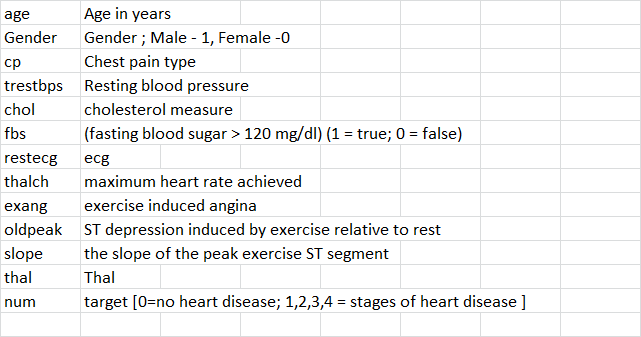

In [ ]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score,f1_score,precision_score,recall_score,roc_curve,roc_auc_score
from sklearn.tree import DecisionTreeClassifier,export_graphviz,plot_tree
from sklearn.preprocessing import LabelEncoder, StandardScaler

**1. Data Preparation:**

In [ ]:
# Load the dataset from the Excel file
file_path = r'/content/heart_disease.xlsx'
df = pd.read_excel(file_path, sheet_name=None)

# Display the sheet names to ensure we are reading the correct sheet
print("Sheet names:", df.keys())

# Load the specific sheet
df_heart = pd.read_excel(file_path,sheet_name='Heart_disease')  # Replace 'Sheet1' with the correct sheet name if different

# Display the first few rows of the DataFrame
print(df_heart.head())

Sheet names: dict_keys(['Description', 'Heart_disease'])
   age   sex               cp  trestbps  chol    fbs         restecg  thalch  \
0   63  Male   typical angina       145   233   True  lv hypertrophy     150   
1   41  Male  atypical angina       135   203  False          normal     132   
2   57  Male     asymptomatic       140   192  False          normal     148   
3   52  Male   typical angina       118   186  False  lv hypertrophy     190   
4   57  Male     asymptomatic       110   201  False          normal     126   

   exang  oldpeak        slope          thal  num  
0  False      2.3  downsloping  fixed defect    0  
1  False      0.0         flat  fixed defect    0  
2  False      0.4         flat  fixed defect    0  
3  False      0.0         flat  fixed defect    0  
4   True      1.5         flat  fixed defect    0  


In [ ]:
#first few rows
df_heart.head()

age   sex               cp  trestbps  chol    fbs         restecg  thalch  \
0   63  Male   typical angina       145   233   True  lv hypertrophy     150   
1   41  Male  atypical angina       135   203  False          normal     132   
2   57  Male     asymptomatic       140   192  False          normal     148   
3   52  Male   typical angina       118   186  False  lv hypertrophy     190   
4   57  Male     asymptomatic       110   201  False          normal     126   

   exang  oldpeak        slope          thal  num  
0  False      2.3  downsloping  fixed defect    0  
1  False      0.0         flat  fixed defect    0  
2  False      0.4         flat  fixed defect    0  
3  False      0.0         flat  fixed defect    0  
4   True      1.5         flat  fixed defect    0

In [ ]:
#last few rows
df_heart.tail()

age   sex            cp  trestbps  chol    fbs           restecg  thalch  \
903   53  Male  asymptomatic       125     0  False            normal     120   
904   62  Male  asymptomatic       166   170  False  st-t abnormality     120   
905   56  Male   non-anginal       170     0  False    lv hypertrophy     123   
906   56  Male   non-anginal       144   208   True  st-t abnormality     105   
907   57  Male  asymptomatic       142   277   True  st-t abnormality     182   

     exang  oldpeak        slope               thal  num  
903  False      1.5    upsloping       fixed defect    4  
904   True      3.0         flat  reversable defect    4  
905   True      2.5  downsloping             normal    4  
906   TURE      NaN  downsloping       fixed defect    4  
907  FALSE      NaN         flat       fixed defect    4

**2. Exploratory Data Analysis (EDA):**

In [ ]:
# Check for missing values
print(df_heart.isnull().sum())

age          0
sex          0
cp           0
trestbps     0
chol         0
fbs          0
restecg      0
thalch       0
exang        0
oldpeak     62
slope        0
thal         0
num          0
dtype: int64


**oldpeak has missing values.**

In [ ]:
# Handle missing values for numerical columns only
for col in df_heart.select_dtypes(include=['number']):
    df_heart[col].fillna(df_heart[col].mean(), inplace=True)

# Handle missing values for categorical columns (example: fill with most frequent value)
for col in df_heart.select_dtypes(include=['category']):
    df_heart[col].fillna(df_heart[col].mode()[0], inplace=True)

**Missing values replaced with mean values.**

In [ ]:
# Summary statistics
print(df_heart.describe())

              age    trestbps        chol      thalch     oldpeak         num
count  908.000000  908.000000  908.000000  908.000000  908.000000  908.000000
mean    53.791850  133.430617  201.484581  135.957048    0.891253    1.008811
std      9.158031   20.401608  112.097949   26.804929    1.055826    1.144436
min     29.000000    0.000000    0.000000   60.000000   -2.600000    0.000000
25%     47.750000  120.000000  176.750000  118.000000    0.000000    0.000000
50%     54.000000  130.000000  224.000000  138.000000    0.800000    1.000000
75%     60.000000  144.000000  270.000000  156.000000    1.500000    2.000000
max     77.000000  200.000000  603.000000  202.000000    6.200000    4.000000


- **age and thalch** (maximum heart rate achieved) have normal distributions with the majority of the data clustered around the mean.
- **trestbps and chol** show a wider range of values, with some possible outliers (e.g., a minimum value of 0 for resting blood pressure and serum cholesterol).
- **oldpeak** has missing values that were filled with the mean.
- The target variable **num** shows a range from 0 to 4, suggesting different severity levels of heart disease.

In [ ]:
# Data types
print(df_heart.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 908 entries, 0 to 907
Data columns (total 13 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       908 non-null    int64  
 1   sex       908 non-null    object 
 2   cp        908 non-null    object 
 3   trestbps  908 non-null    int64  
 4   chol      908 non-null    int64  
 5   fbs       908 non-null    bool   
 6   restecg   908 non-null    object 
 7   thalch    908 non-null    int64  
 8   exang     908 non-null    object 
 9   oldpeak   908 non-null    float64
 10  slope     908 non-null    object 
 11  thal      908 non-null    object 
 12  num       908 non-null    int64  
dtypes: bool(1), float64(1), int64(5), object(6)
memory usage: 86.1+ KB
None


In [ ]:
# Typecasting columns to appropriate data types
#conversion to categorical type
df_heart['sex'] = df_heart['sex'].astype('category')  # assuming 'sex' is categorical
df_heart['cp'] = df_heart['cp'].astype('category')  # assuming 'cp' is categorical
df_heart['restecg'] = df_heart['restecg'].astype('category')  # assuming 'restecg' is categorical
df_heart['exang'] = df_heart['exang'].astype('category')  # assuming 'exang' is categorical
df_heart['slope'] = df_heart['slope'].astype('category')  # assuming 'slope' is categorical
df_heart['thal'] = df_heart['thal'].astype('category')  # assuming 'thal' is categorical
df_heart['num'] = df_heart['num'].astype('category')  # assuming 'num' is categorical


In [ ]:
# Display unique values in the 'num' target column
unique_values = df_heart['num'].unique()
print(unique_values)


[0, 1, 2, 3, 4]
Categories (5, int64): [0, 1, 2, 3, 4]


In [ ]:
#checking for uniques values in every column
df_heart.nunique()

age          49
sex           2
cp            4
trestbps     85
chol        228
fbs           2
restecg       3
thalch      122
exang         4
oldpeak      54
slope         3
thal          3
num           5
dtype: int64

**3.Data Visualisation**

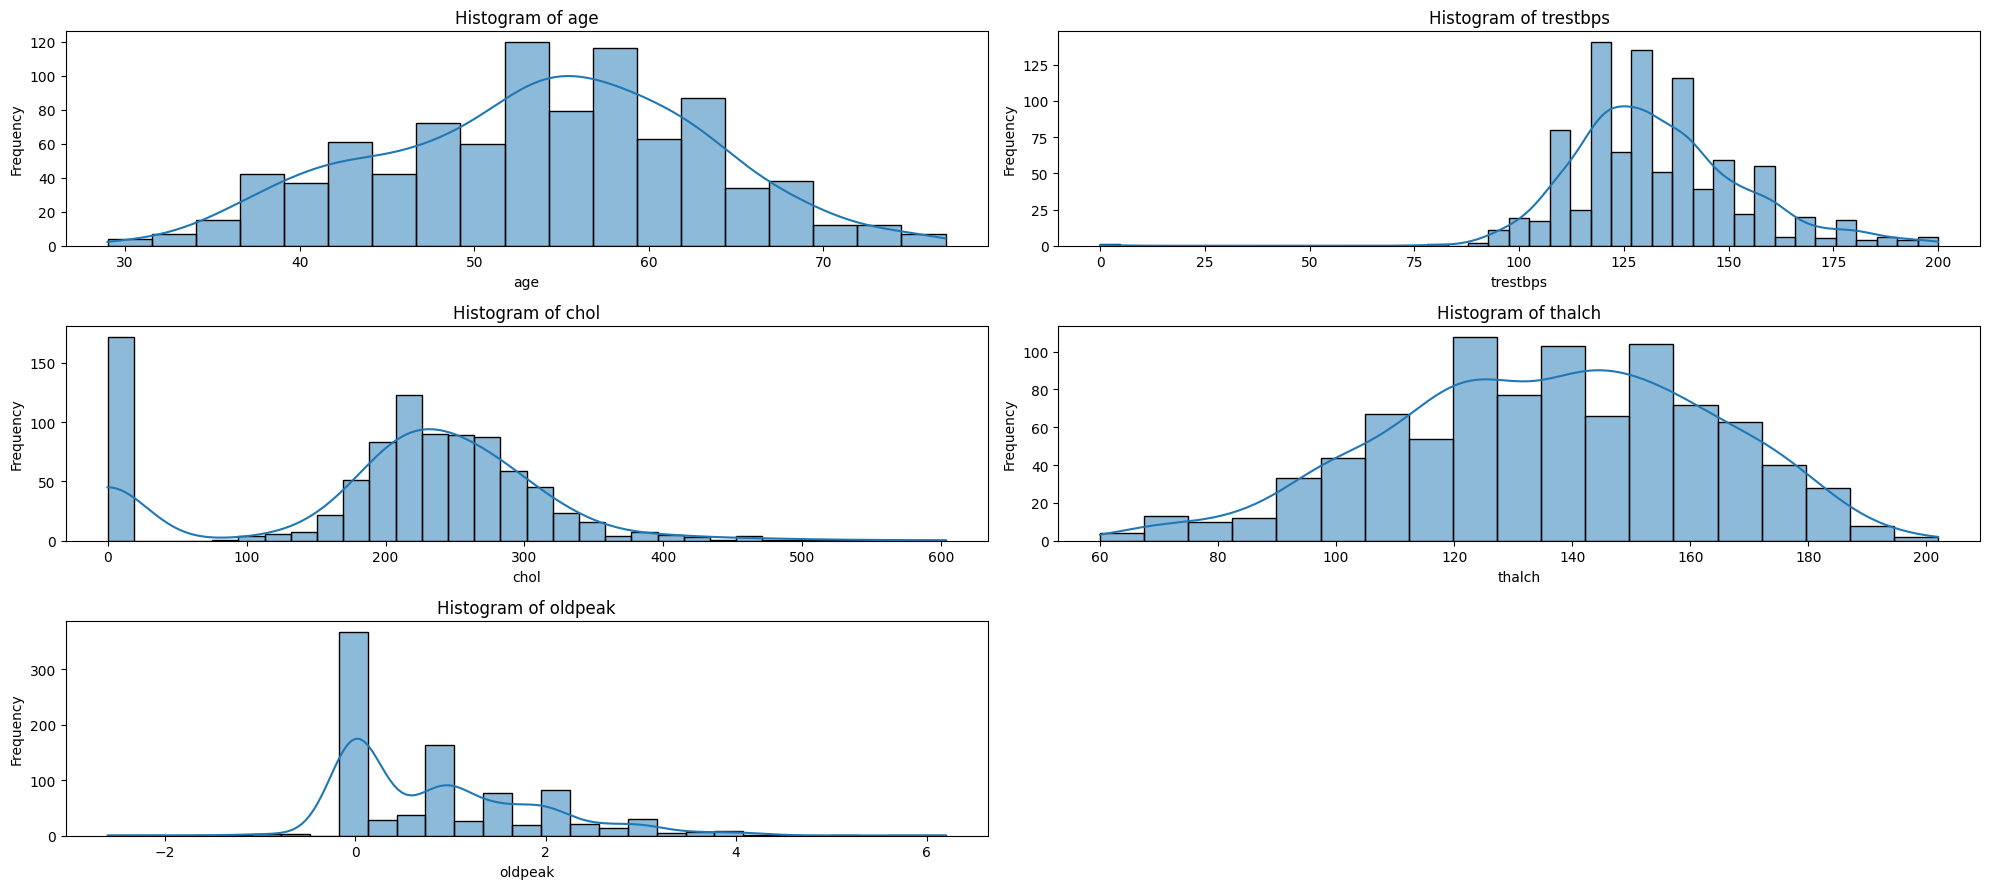

In [ ]:
#Histogram
# Define the numerical columns
numerical_columns = df_heart.select_dtypes(include=['number']).columns
# Calculate the number of rows and columns for subplots
n_cols = 2
n_rows = (len(numerical_columns) + n_cols - 1) // n_cols  # ceiling division

# Create subplots
fig, axes = plt.subplots(n_rows, n_cols, figsize=(20, n_rows * 3)) # Adjust height for better spacing
axes = axes.flatten()

# Plot histograms
for i, col in enumerate(numerical_columns):
    sns.histplot(df_heart[col], kde=True, ax=axes[i])
    axes[i].set_title(f'Histogram of {col}')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Frequency')

# Hide any unused subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

# Adjust layout
plt.tight_layout()
plt.show()


**1.age:** The age distribution is approximately normal, with most individuals falling between 40 and 70 years old. The peak is around the mid-50s.

**2.trestbps (resting blood pressure):** The distribution of resting blood pressure is slightly right-skewed, with a majority of values between 100 and 150. There are some outliers with resting blood pressure as low as 0, which might indicate missing or erroneous data entries.

**3.chol (serum cholesterol):** The cholesterol levels have a significant number of entries at 0, which could be missing or erroneous data. Apart from this, the distribution is right-skewed, with most values between 100 and 300.

**4.thalch (maximum heart rate achieved):**The distribution of maximum heart rate achieved is roughly normal, with most values between 100 and 175. There is a peak around 130-140.

**5.oldpeak (ST depression induced by exercise relative to rest):** The oldpeak values are highly right-skewed, with most values concentrated around 0. There are a few outliers with significantly higher values.

**6.num (diagnosis of heart disease, target variable):** The target variable num shows a distribution with several peaks, indicating multiple classes. Most values are at 0, suggesting a significant number of individuals without heart disease, followed by values at 1 and 2.

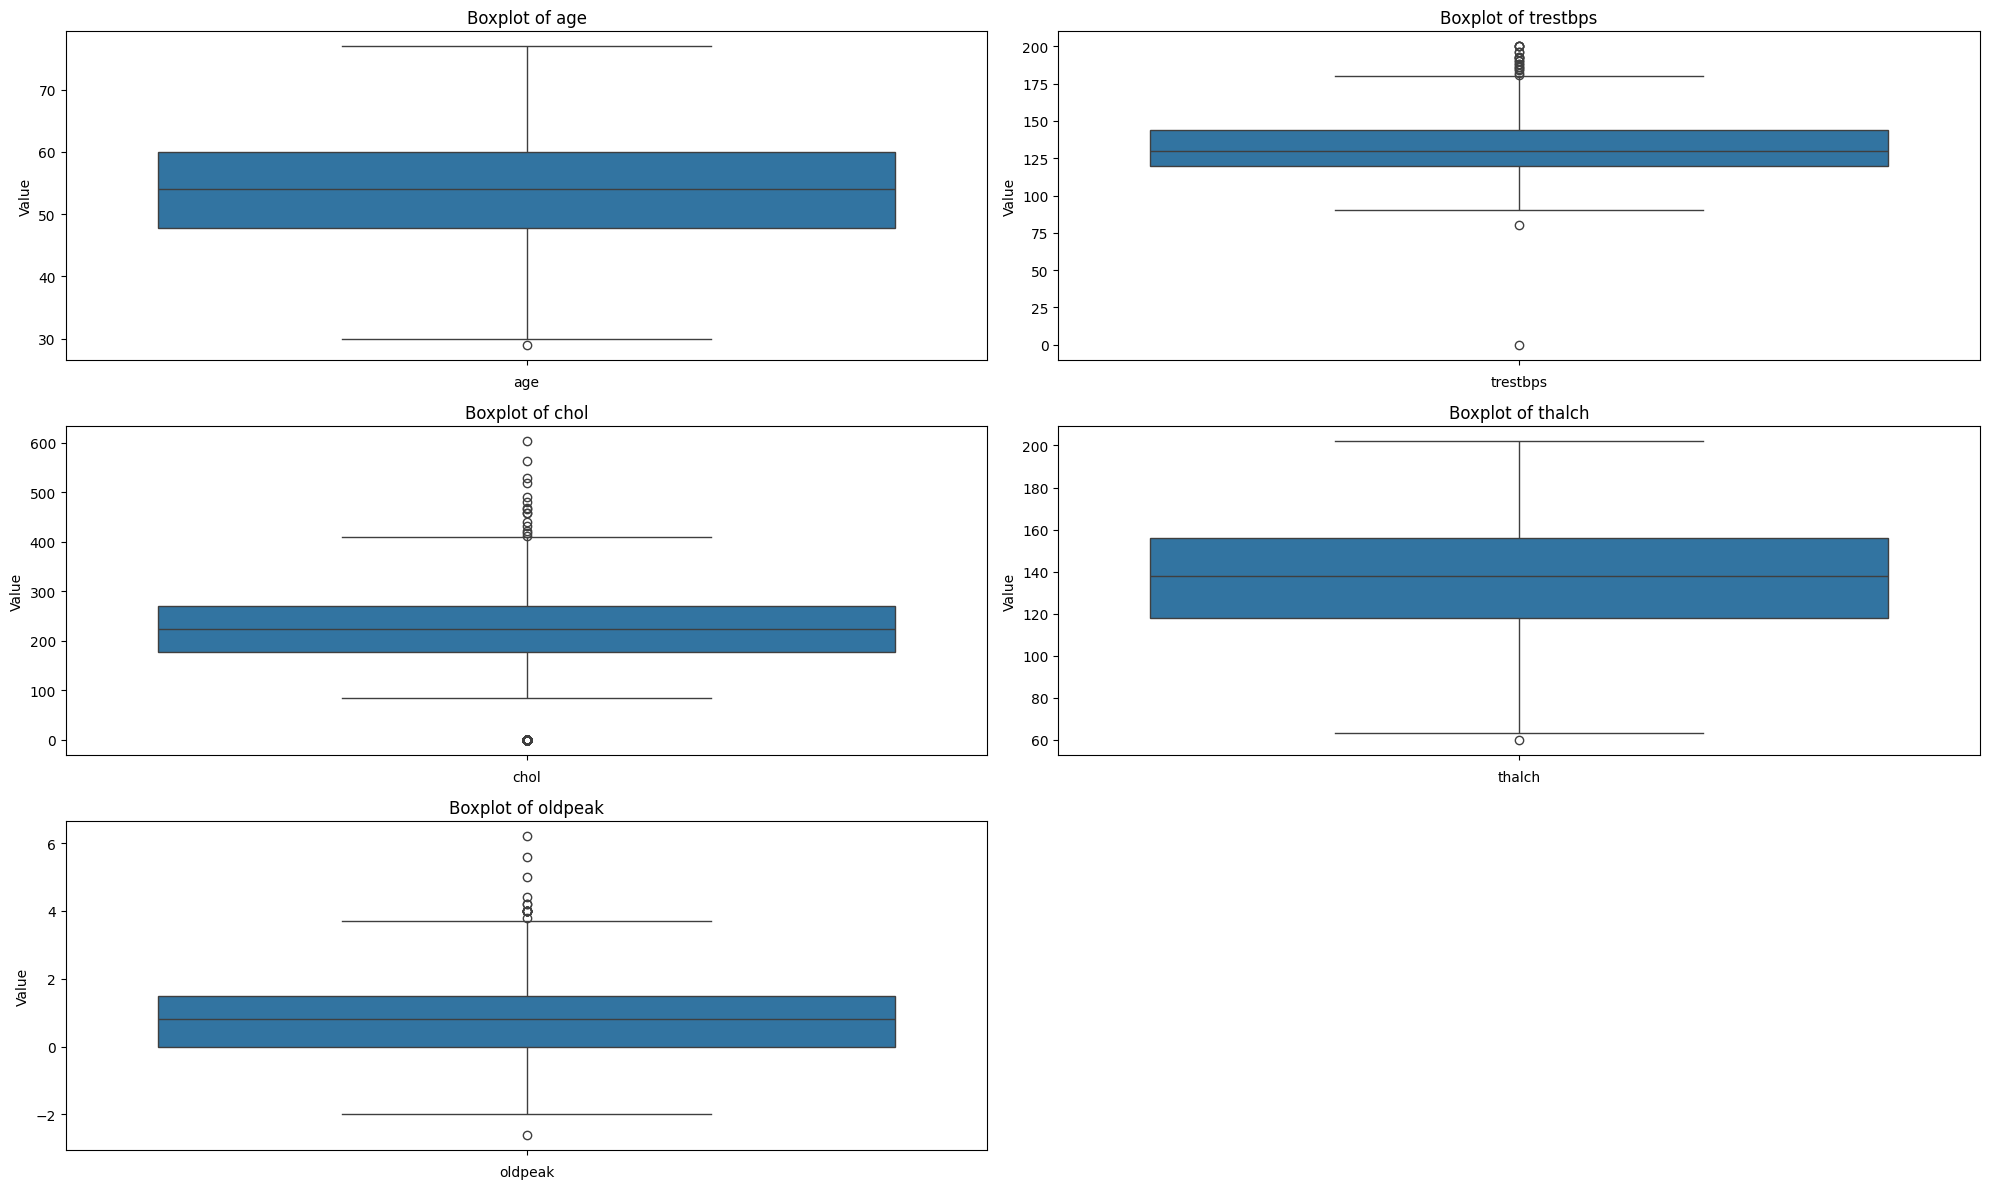

In [ ]:
#Boxplots
# Calculate the number of rows and columns for subplots
n_cols = 2
n_rows = (len(numerical_columns) + n_cols - 1) // n_cols  # ceiling division

# Create subplots
fig, axes = plt.subplots(n_rows, n_cols, figsize=(20, n_rows * 4)) # Adjust height for better spacing
axes = axes.flatten()

# Plot boxplots
for i, col in enumerate(numerical_columns):
    sns.boxplot(y=df_heart[col], ax=axes[i])
    axes[i].set_title(f'Boxplot of {col}')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Value')

# Hide any unused subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

# Adjust layout
plt.tight_layout()
plt.show()

**1.age:** The age distribution appears symmetric with no significant outliers. The range is from approximately 30 to 70, with the median around the mid-50s.

**2.trestbps (resting blood pressure):** The distribution shows a few outliers on the lower end, notably a value close to 0, which may indicate erroneous data. Most values lie between 100 and 150.

**3.chol (serum cholesterol):** There are several outliers both on the high and low ends, with many data points above 400 and some at 0, indicating possible data errors or missing values. The central 50% of the data ranges from about 175 to 300.

**4.thalch (maximum heart rate achieved):** The distribution is fairly symmetric with a few low outliers. The range is from about 60 to 200, with the median around 140.

**5.oldpeak (ST depression induced by exercise relative to rest):**
The distribution has several high and low outliers, with values exceeding 4 and falling below -2. The majority of values are between 0 and 2.

**6.num (diagnosis of heart disease, target variable):** The target variable num has no significant outliers and a range from 0 to 4. The distribution indicates multiple classes, with a significant concentration at 0 and 1.

In [ ]:
outliers = {}

for col in numerical_columns: # Iterate over the Index object directly
    Q1 = np.quantile(df_heart[col], 0.25)
    Q3 = np.quantile(df_heart[col], 0.75)
    IQR = (Q3 - Q1)
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers[col] = df_heart[(df_heart[col] < lower_bound) | (df_heart[col] > upper_bound)][col]

# Print the outliers
for col, values in outliers.items():
    if not values.empty:
        print(f"Outliers in {col}:\n{values}\n")
    else:
        print(f"No outliers in {col}\n")

Outliers in age:
134    29
Name: age, dtype: int64

Outliers in trestbps:
190     80
243    190
383    181
384    188
387    193
396    196
487    192
488    185
589    200
766    184
768    192
771    186
789    200
791    200
795    200
797    188
842      0
872    182
873    196
875    193
879    186
900    190
Name: trestbps, dtype: int64

Outliers in chol:
74     417
147    439
152      0
157    564
176      0
      ... 
893      0
895      0
901      0
903      0
905      0
Name: chol, Length: 187, dtype: int64

Outliers in thalch:
676    60
Name: thalch, dtype: int64

Outliers in oldpeak:
149    4.2
525   -2.6
537    4.0
587    5.0
722    4.0
773    4.0
792    6.2
794    5.6
795    4.0
814    4.2
839    4.0
880    4.4
889    4.0
894    3.8
898    4.0
899    4.0
Name: oldpeak, dtype: float64



- Remove Outliers in Age: Directly filter out the age 29.
- Impute Zeros in Trestbps and Chol: Replace zeros with the median value of the respective columns.
- Remove High Outliers in Trestbps and Chol: Filter out values above 180 for trestbps and 500 for chol, which are considered extreme.
- Remove Outliers in Thalach: Directly filter out the value 60.
- Remove Negative and Extreme High Values in Oldpeak: Filter out values below 0 and above 6.

In [ ]:
# Remove the single outlier in age
df_heart = df_heart[df_heart['age'] != 29]

# Replace zeros in trestbps and chol with the median
df_heart['trestbps'].replace(0, np.nan, inplace=True)
df_heart['trestbps'].fillna(df_heart['trestbps'].median(), inplace=True)

df_heart['chol'].replace(0, np.nan, inplace=True)
df_heart['chol'].fillna(df_heart['chol'].median(), inplace=True)

# Remove extreme outliers in trestbps and chol based on a threshold
df_heart = df_heart[df_heart['trestbps'] <= 180]
df_heart = df_heart[df_heart['chol'] <= 500]

# Remove the single outlier in thalach
df_heart = df_heart[df_heart['thalch'] != 60]

# Remove negative and extreme high values in oldpeak
df_heart = df_heart[(df_heart['oldpeak'] >= 0) & (df_heart['oldpeak'] <= 6)]

In [ ]:
# Check the cleaned data
print(df_heart.describe())

              age    trestbps        chol      thalch     oldpeak
count  869.000000  869.000000  869.000000  869.000000  869.000000
mean    53.680092  132.525892  245.444189  136.521289    0.912375
std      9.078324   18.097301   51.979996   26.238907    1.025207
min     30.000000   80.000000   85.000000   63.000000    0.000000
25%     47.000000  120.000000  215.000000  118.000000    0.000000
50%     54.000000  130.000000  240.000000  139.000000    0.800000
75%     60.000000  142.000000  270.000000  156.000000    1.500000
max     77.000000  180.000000  491.000000  194.000000    5.600000


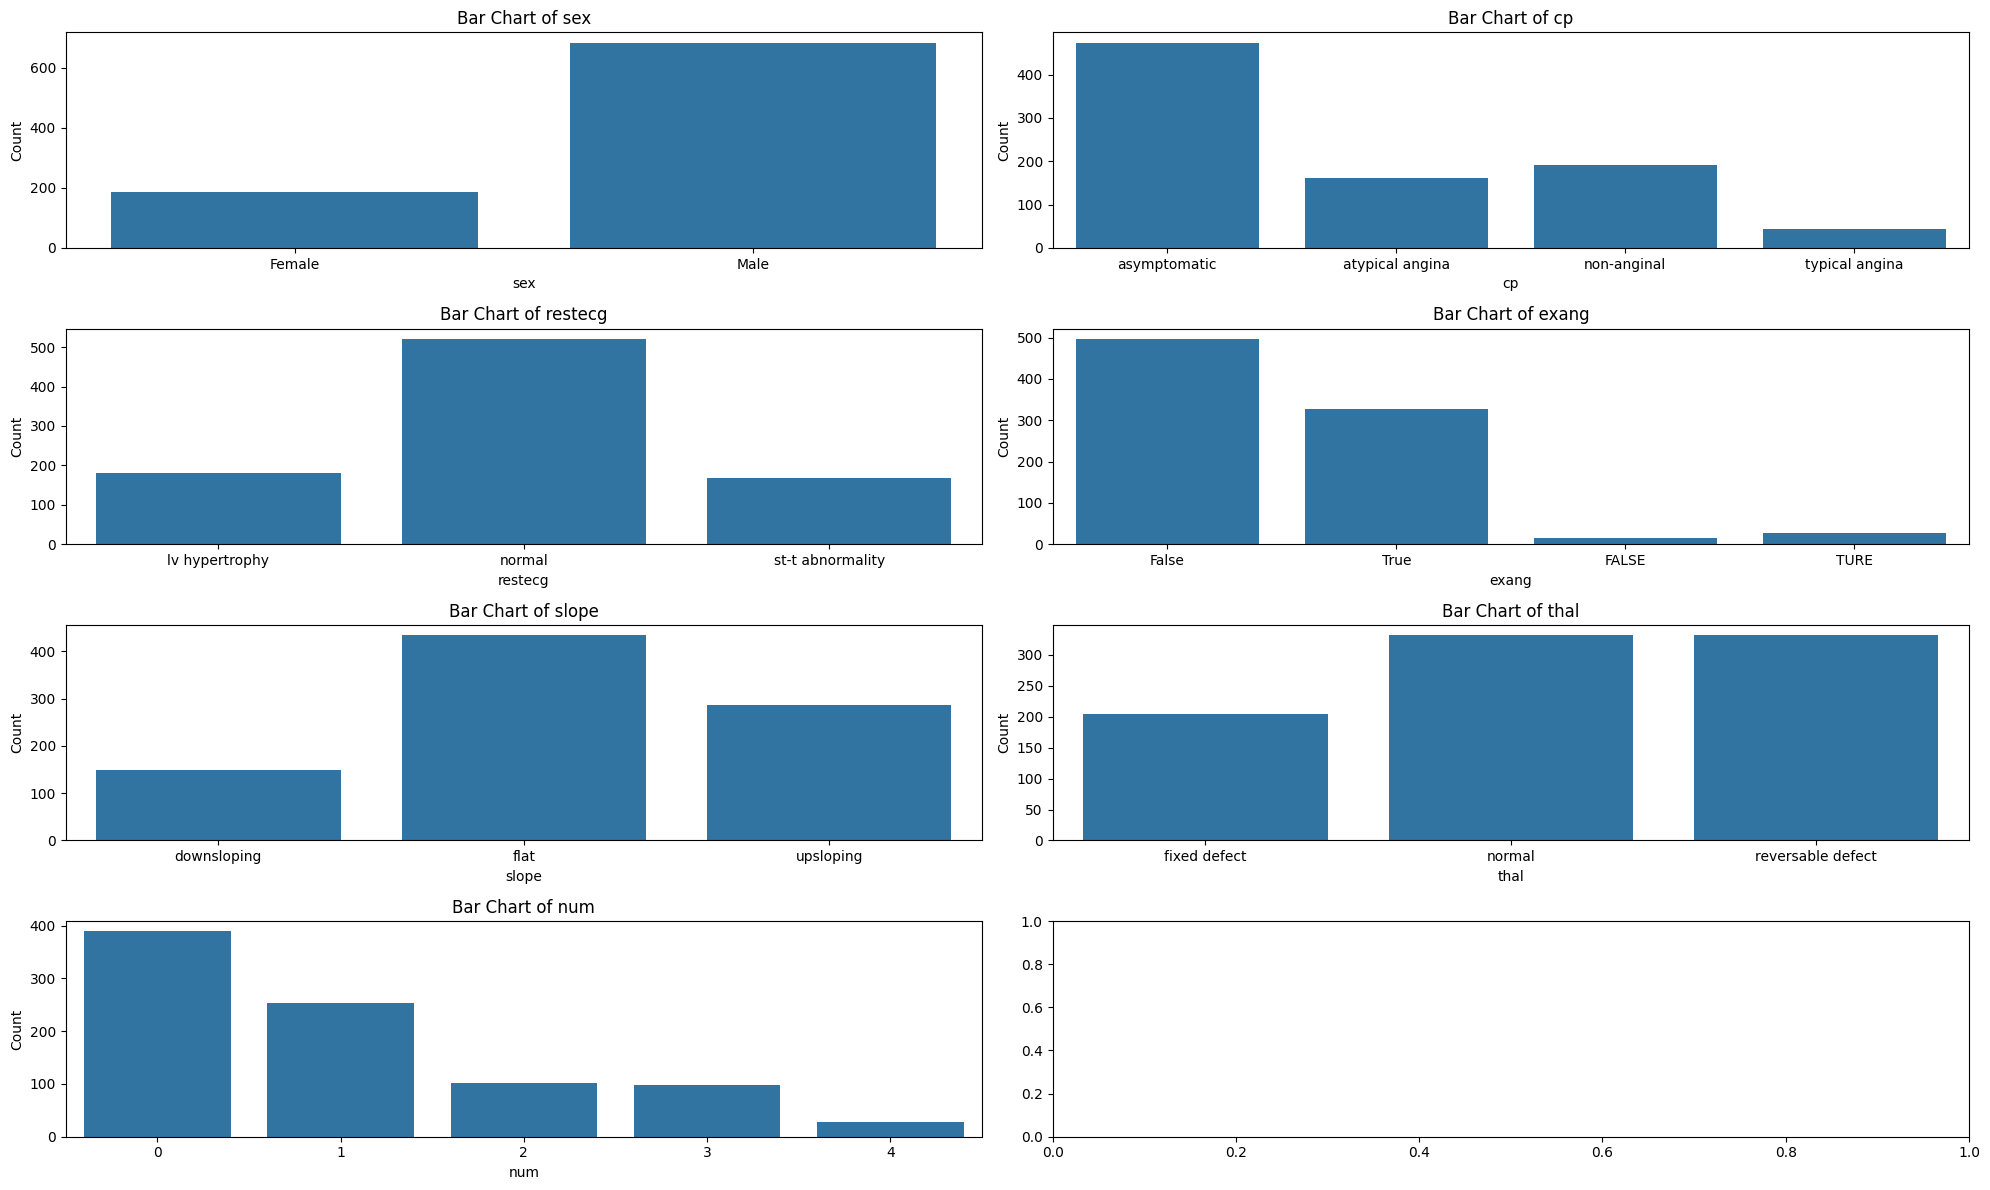

In [ ]:
#Barcharts
# Define the categorical columns
categorical_columns = df_heart.select_dtypes(include=['category']).columns

# Calculate the number of rows and columns for subplots
n_cols = 2
n_rows = (len(categorical_columns) + n_cols - 1) // n_cols

# Create subplots
fig, axes = plt.subplots(n_rows, n_cols, figsize=(20, n_rows * 3))
axes = axes.flatten()

# If there's only one categorical column, axes won't be an array
if n_rows == 1:
    axes = [axes]

# Plot bar charts
for i, col in enumerate(categorical_columns):
    sns.countplot(x=df_heart[col], ax=axes[i])
    axes[i].set_title(f'Bar Chart of {col}')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Count')

# Adjust layout
plt.tight_layout()
plt.show()

**1.sex:** The dataset is imbalanced with more males (around 700) compared to females (around 200).

**2.cp (chest pain type):** The majority of the patients have asymptomatic chest pain. The least common type is typical angina.

**3.restecg (resting electrocardiographic results):** Most patients have a normal resting ECG, with fewer showing signs of left ventricular hypertrophy or ST-T abnormalities.

**4.exang (exercise induced angina):**Most patients do not have exercise-induced angina (False), but a significant portion does (True). There are also some inconsistencies in the data with entries like FALSE and TURE.

**5.slope (the slope of the peak exercise ST segment):**The flat slope is the most common, followed by upsloping and downsloping.

**6.thal (thalassemia):** The data shows a near-equal distribution between normal and reversible defect, with fixed defect being less common.

In [ ]:
#Correlation Heatmap
correlation_matrix = df_heart[numerical_columns].corr() # Calculate correlation on the DataFrame subset
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5, ax=axes[-1])
axes[-1].set_title('Correlation Heatmap')

Text(0.5, 1.0, 'Correlation Heatmap')

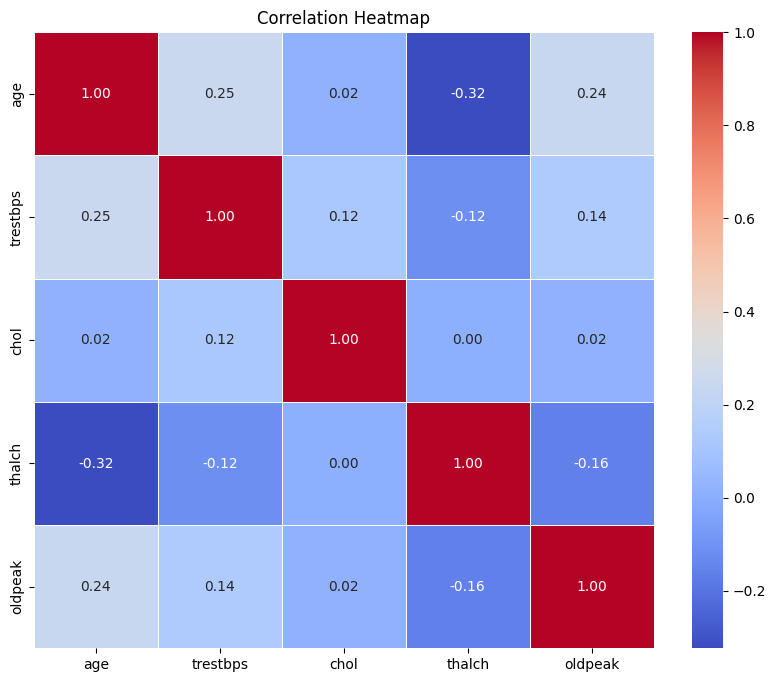

In [ ]:
#Generate a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix , annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

**num:**
- **age: 0.33**
- **trestbps: 0.14**
- **chol: -0.24**
- **thalach: -0.32**
- **oldpeak: 0.42**

In this heatmap, red indicates a strong positive correlation, blue indicates a strong negative correlation, and lighter colors represent weaker correlations.

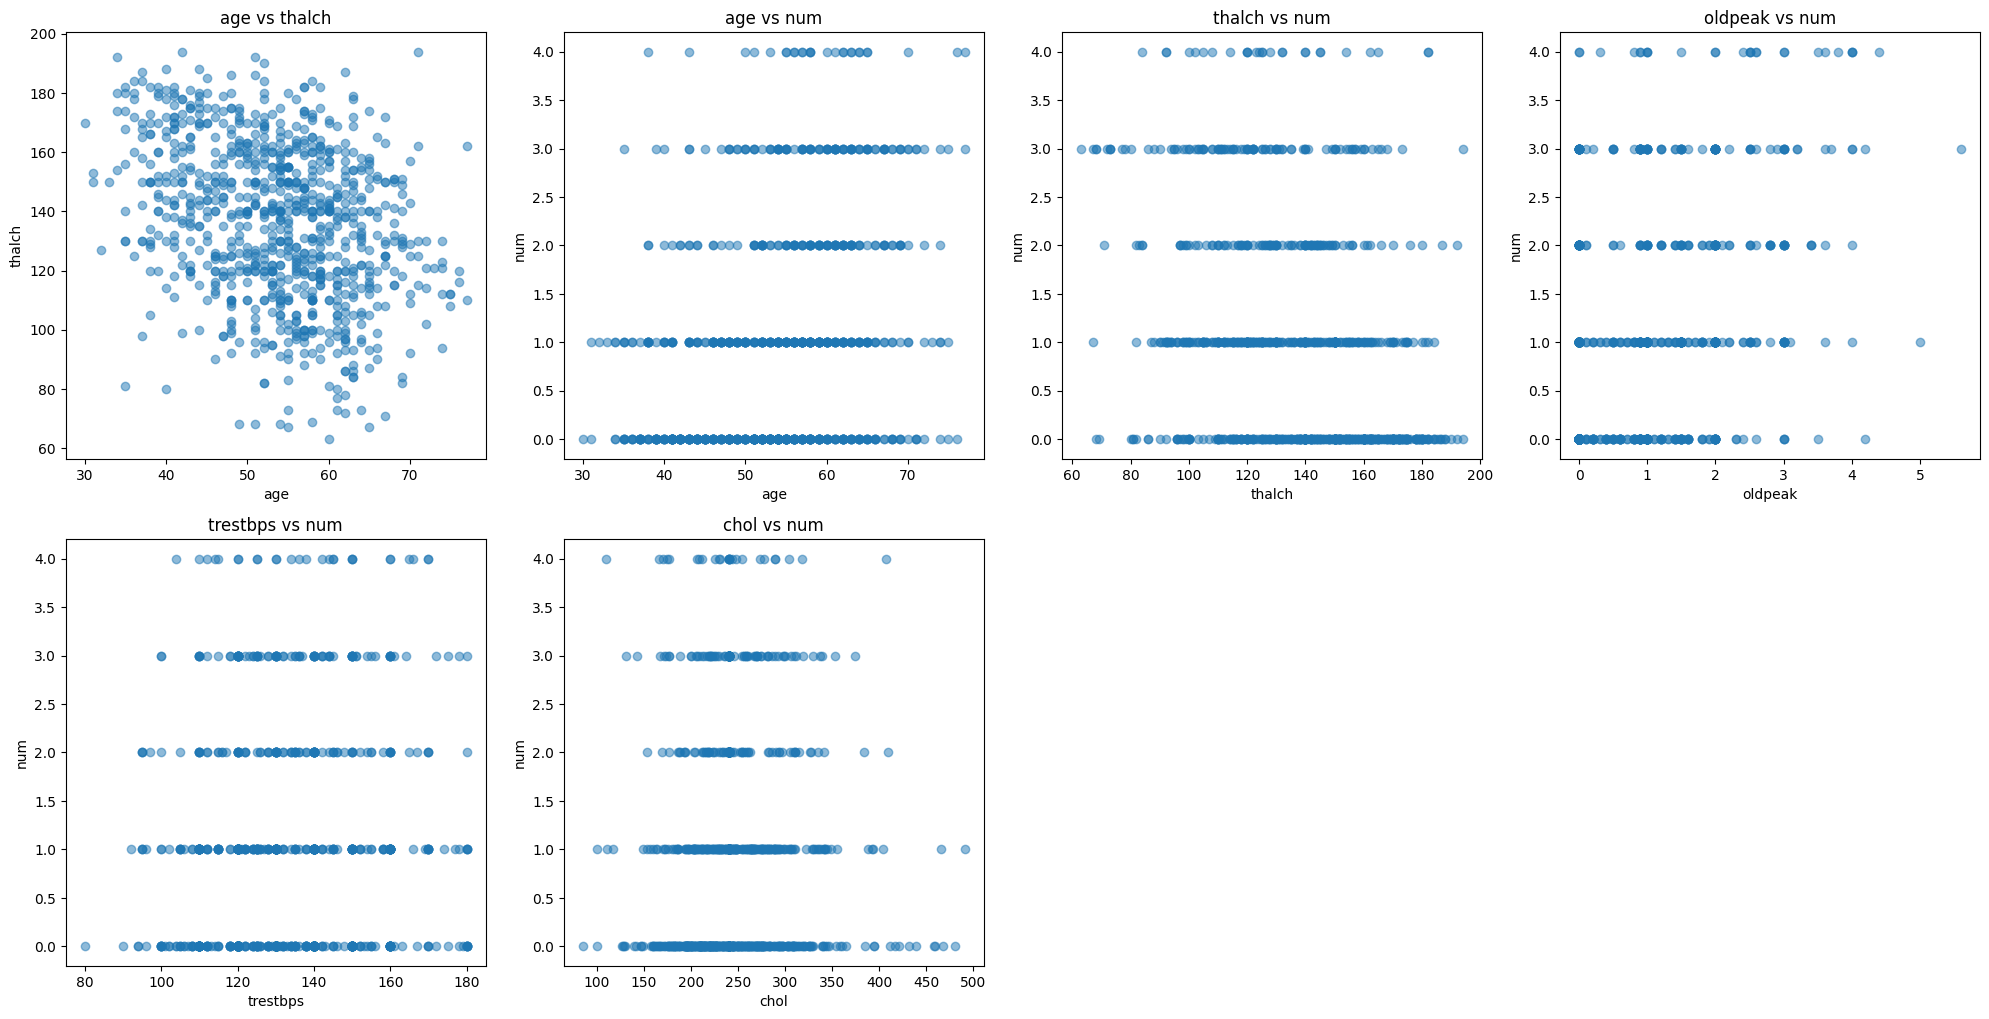

In [ ]:
#Scatterplots for the pairs with higher correlations to visually inspect the relationships.
# Define the pairs with higher correlations
pairs = [
    ('age', 'thalch'),
    ('age', 'num'),
    ('thalch', 'num'),
    ('oldpeak', 'num'),
    ('trestbps', 'num'),
    ('chol', 'num'),
]

# Check if the columns exist in the DataFrame
for var1, var2 in pairs:
    if var1 not in df_heart.columns:
        print(f"Warning: Column '{var1}' not found in DataFrame.")
    if var2 not in df_heart.columns:
        print(f"Warning: Column '{var2}' not found in DataFrame.")

# Create scatter plots for each pair, only if both columns exist
plt.figure(figsize=(20, 20))

for idx, (var1, var2) in enumerate(pairs):
    if var1 in df_heart.columns and var2 in df_heart.columns:
        plt.subplot(4, 4, idx + 1)
        plt.scatter(df_heart[var1], df_heart[var2], alpha=0.5)
        plt.title(f'{var1} vs {var2}')
        plt.xlabel(var1)
        plt.ylabel(var2)

plt.tight_layout()
plt.show()

- **age vs thalach:** Shows a negative correlation, indicating that as age increases, thalach tends to decrease, consistent with the correlation coefficient of -0.33.

- **age vs num:** Displays a positive correlation, indicating that as age increases, the value of num also tends to increase, consistent with the correlation coefficient of 0.33.

- **thalach vs num:** Shows a negative correlation, indicating that as thalach increases, the value of num tends to decrease, consistent with the correlation coefficient of -0.32.

- **oldpeak vs num:** Displays a positive correlation, indicating that as oldpeak increases, the value of num also tends to increase, consistent with the correlation coefficient of 0.42.

- **trestbps vs num:** Shows a weaker positive correlation, consistent with the correlation coefficient of 0.14.

- **chol vs num:** Displays a weaker negative correlation, consistent with the correlation coefficient of -0.24.

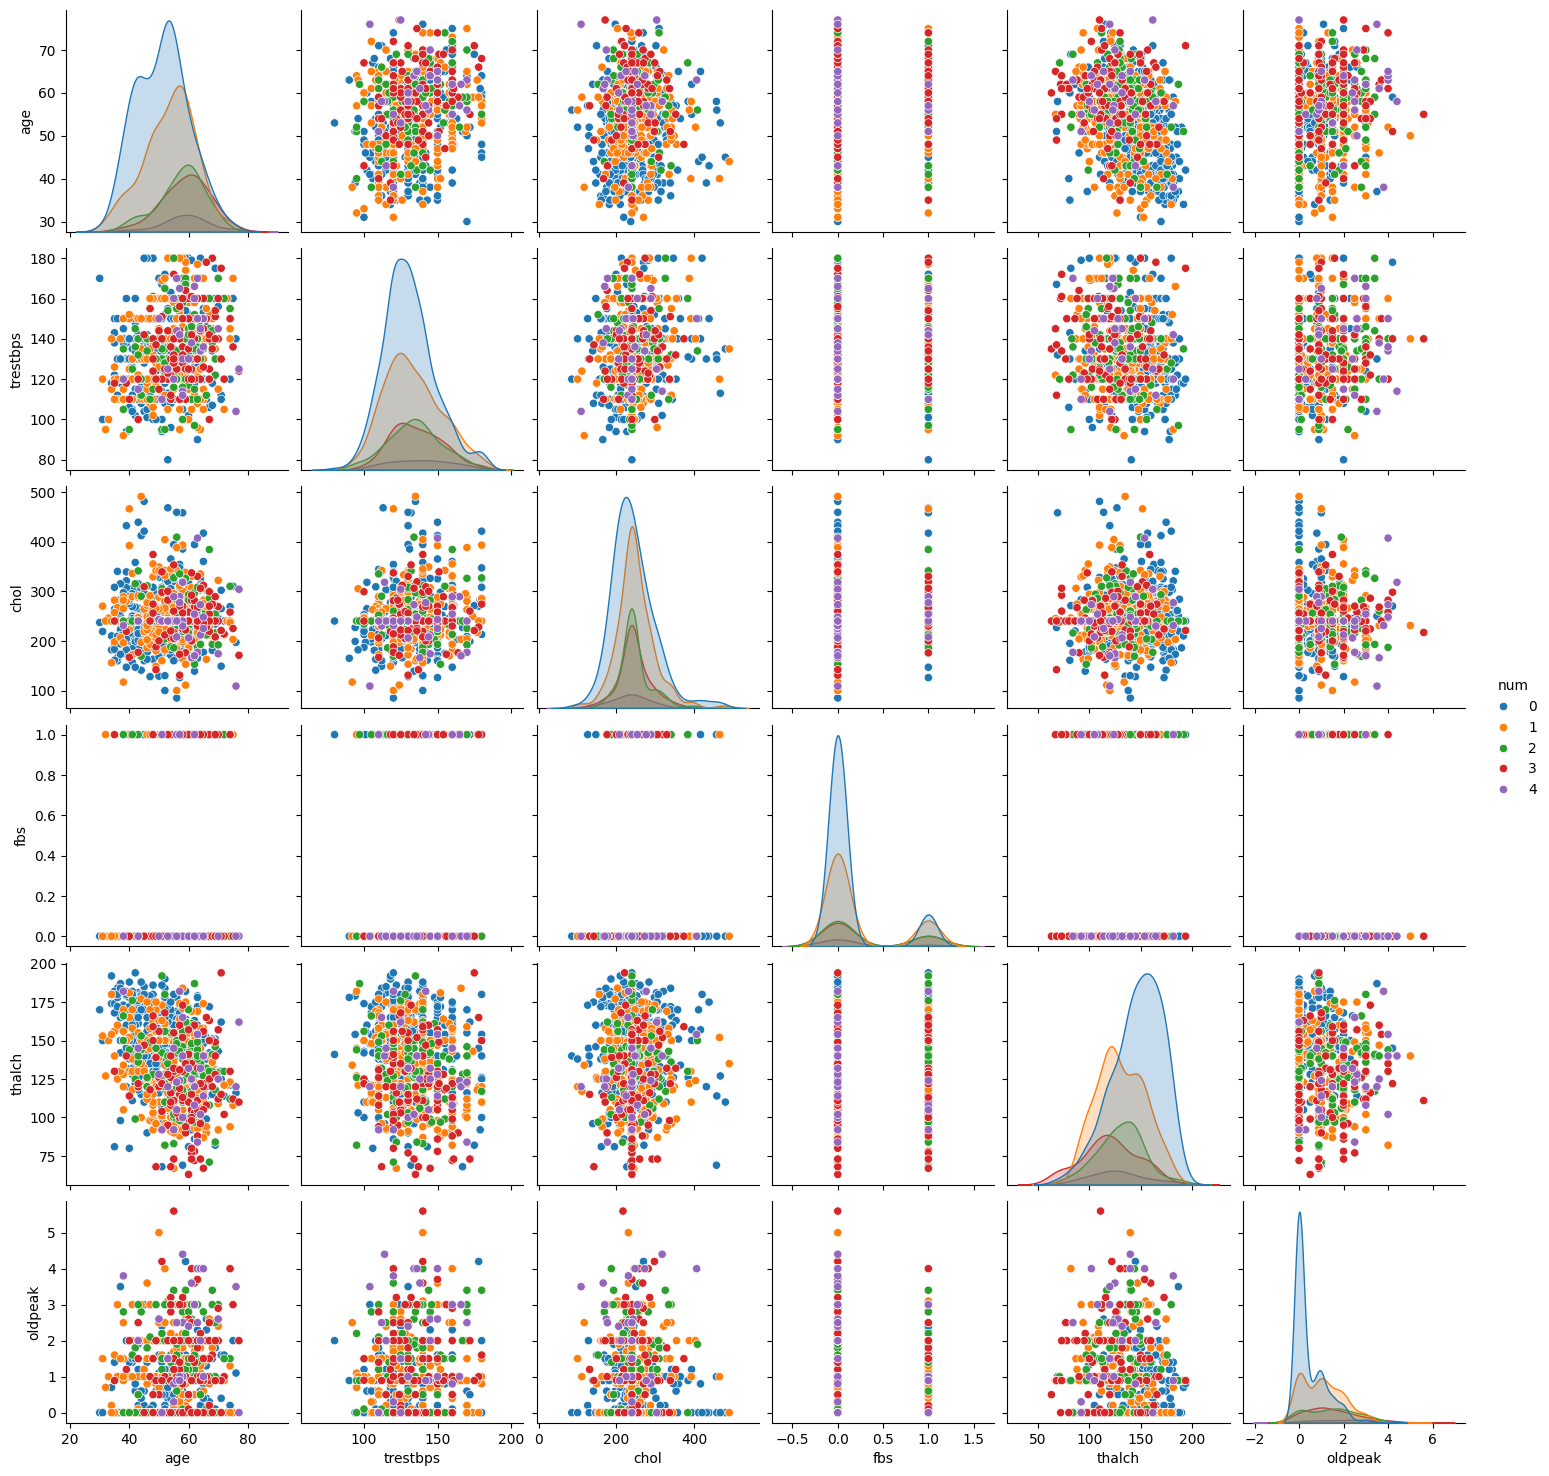

In [ ]:
sns.pairplot(df_heart, hue='num')
plt.show()

- **thalach and oldpeak:** A scattered pattern with an evident negative correlation.
- **age and thalach:** A clear negative correlation, indicating that older age is associated with a lower maximum heart rate achieved.
- **age and oldpeak:** A mild positive correlation, suggesting that older individuals might have higher ST depression induced by exercise.

**4. Feature Engineering**

In [ ]:
# Encode categorical variables
label_encoders = {}
for column in df_heart.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    df_heart[column] = le.fit_transform(df_heart[column].astype(str))
    label_encoders[column] = le


# Scale numerical features
scaler = StandardScaler()
numerical_columns = df_heart.select_dtypes(include=['float64', 'int64']).columns
df_heart[numerical_columns] = scaler.fit_transform(df_heart[numerical_columns])

# Display the first few rows after feature engineering
print(df_heart.head())

        age   sex               cp  trestbps      chol    fbs         restecg  \
0  1.027202  Male   typical angina  0.689677 -0.239541   True  lv hypertrophy   
1 -1.397548  Male  atypical angina  0.136790 -0.817019  False          normal   
2  0.365907  Male     asymptomatic  0.413234 -1.028760  False          normal   
3 -0.185173  Male   typical angina -0.803117 -1.144256  False  lv hypertrophy   
4  0.365907  Male     asymptomatic -1.245427 -0.855517  False          normal   

     thalch  exang   oldpeak        slope          thal num  
0  0.513988  False  1.354287  downsloping  fixed defect   0  
1 -0.172412  False -0.890455         flat  fixed defect   0  
2  0.437721  False -0.500065         flat  fixed defect   0  
3  2.039319  False -0.890455         flat  fixed defect   0  
4 -0.401211   True  0.573507         flat  fixed defect   0  


**5.Decision Tree Classification**

In [ ]:
# Assuming 'num' is the target variable
X = df_heart.drop('num', axis=1)
y = df_heart['num']

# Split the dataset into training and testing sets (80-20 split)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((695, 12), (174, 12), (695,), (174,))

In [ ]:
#Fitting Decision Tree classifier to the training set
classifier_DT = DecisionTreeClassifier(criterion='gini', random_state=0)
# Handle categorical features in X_train
X_train_encoded = pd.get_dummies(X_train)
# Handle categorical features in X_test
X_test_encoded = pd.get_dummies(X_test)

# Fit the model with the encoded data
classifier_DT.fit(X_train_encoded, y_train)

DecisionTreeClassifier(random_state=0)

In [ ]:
#Predicting the test set result
y_pred = classifier_DT.predict(X_test_encoded)
y_pred

array([1, 0, 0, 0, 1, 2, 0, 1, 1, 2, 0, 1, 1, 0, 4, 1, 0, 1, 1, 1, 0, 0,
       0, 2, 2, 0, 1, 0, 1, 1, 1, 0, 1, 1, 2, 1, 3, 0, 1, 3, 1, 4, 1, 0,
       0, 0, 0, 3, 2, 1, 0, 0, 2, 4, 2, 2, 0, 2, 1, 1, 1, 0, 2, 1, 3, 3,
       0, 1, 0, 2, 0, 2, 1, 3, 0, 0, 2, 0, 2, 2, 0, 2, 2, 0, 0, 2, 0, 1,
       1, 1, 1, 0, 0, 0, 1, 1, 3, 2, 1, 0, 0, 0, 0, 2, 0, 0, 1, 1, 3, 0,
       1, 3, 2, 2, 1, 0, 0, 0, 2, 1, 1, 4, 1, 0, 3, 0, 3, 0, 0, 2, 1, 0,
       0, 0, 1, 0, 1, 0, 1, 2, 2, 2, 0, 2, 0, 1, 0, 0, 0, 1, 2, 3, 1, 0,
       0, 0, 2, 0, 0, 0, 0, 3, 3, 0, 1, 1, 1, 0, 0, 0, 1, 1, 3, 1])

In [ ]:
# Confusion Matrix and Classification Report
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Confusion Matrix:
[[57 13  9  1  0]
 [ 7 26  9  6  1]
 [ 2  8  6  3  0]
 [ 3  5  6  4  3]
 [ 1  2  1  1  0]]

Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.71      0.76        80
           1       0.48      0.53      0.50        49
           2       0.19      0.32      0.24        19
           3       0.27      0.19      0.22        21
           4       0.00      0.00      0.00         5

    accuracy                           0.53       174
   macro avg       0.35      0.35      0.35       174
weighted avg       0.56      0.53      0.54       174



In [ ]:
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')
roc_auc = roc_auc_score(y_test,classifier_DT.predict_proba(X_test_encoded), multi_class='ovr')


In [ ]:
# Display evaluation metrics
print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1-score: {f1:.2f}")
print(f"ROC-AUC: {roc_auc:.2f}")

Accuracy: 0.53
Precision: 0.56
Recall: 0.53
F1-score: 0.54
ROC-AUC: 0.61


- The model has moderate performance, as indicated by the accuracy, precision, recall, and F1-score.
- The ROC-AUC score of 0.61 suggests that the model is better than random guessing but still has significant room for improvement.
- Accuracy (0.53): Indicates that the model is correct slightly more than half of the time.
- Precision (0.56): Suggests that 56% of the positive predictions are correct.
- Recall (0.53): Indicates that the model captures 53% of the actual positives.
- F1-Score (0.54): Shows a moderate balance between precision and recall.
- ROC-AUC (0.61): Suggests that the model has some discriminative power but can be improved.

**6.Hyperparameter Tuning**

In [ ]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grid
param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 10, 20, 30, 40, 50],
    'min_samples_split': [2, 5, 10, 20]
}

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=DecisionTreeClassifier(), param_grid=param_grid, cv=5, scoring='accuracy')

# Fit GridSearchCV
grid_search.fit(X_train_encoded, y_train)

# Get the best parameters and the best model
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

print(f"Best Parameters: {best_params}")


Best Parameters: {'criterion': 'entropy', 'max_depth': 10, 'min_samples_split': 20}


- **Criterion ('entropy'):** Chooses splits that maximize information gain, potentially leading to a more informative but complex tree.
- **Max Depth (10):** Limits the tree's depth to 10 levels, balancing complexity and overfitting.
- **Min Samples Split (20):** Requires at least 20 samples to split a node, promoting generalization and reducing overfitting.

**7.Model Evaluation and Analysis**

In [ ]:
# Predict class labels on the test set using the best model
y_pred_best = best_model.predict(X_test_encoded)

# Calculate evaluation metrics
accuracy_best = accuracy_score(y_test, y_pred_best)
precision_best = precision_score(y_test, y_pred_best, average='macro')
recall_best = recall_score(y_test, y_pred_best, average='macro')
f1_best = f1_score(y_test, y_pred_best, average='macro')
roc_auc_best = roc_auc_score(y_test, y_pred_proba_best, multi_class='ovr') # Use predicted probabilities for ROC-AUC

In [ ]:
print(f"Accuracy: {accuracy_best}")
print(f"Precision: {precision_best}")
print(f"Recall: {recall_best}")
print(f"F1-Score: {f1_best}")
print(f"ROC-AUC: {roc_auc_best}")

Accuracy: 0.5919540229885057
Precision: 0.36838665290677675
Recall: 0.37834407447189405
F1-Score: 0.3650427350427351
ROC-AUC: 0.6905097229724617


- Accuracy (59.20%): The model is correct a little over half the time.
Precision (36.84%): A relatively low precision indicates that a significant portion of positive predictions are incorrect.
- Recall (37.83%): A relatively low recall indicates that the model misses a significant portion of actual positive cases.
- F1-Score (36.50%): The balance between precision and recall shows moderate performance.
- ROC-AUC (69.05%): Indicates the model has some ability to distinguish between classes, better than random guessing but not strong.

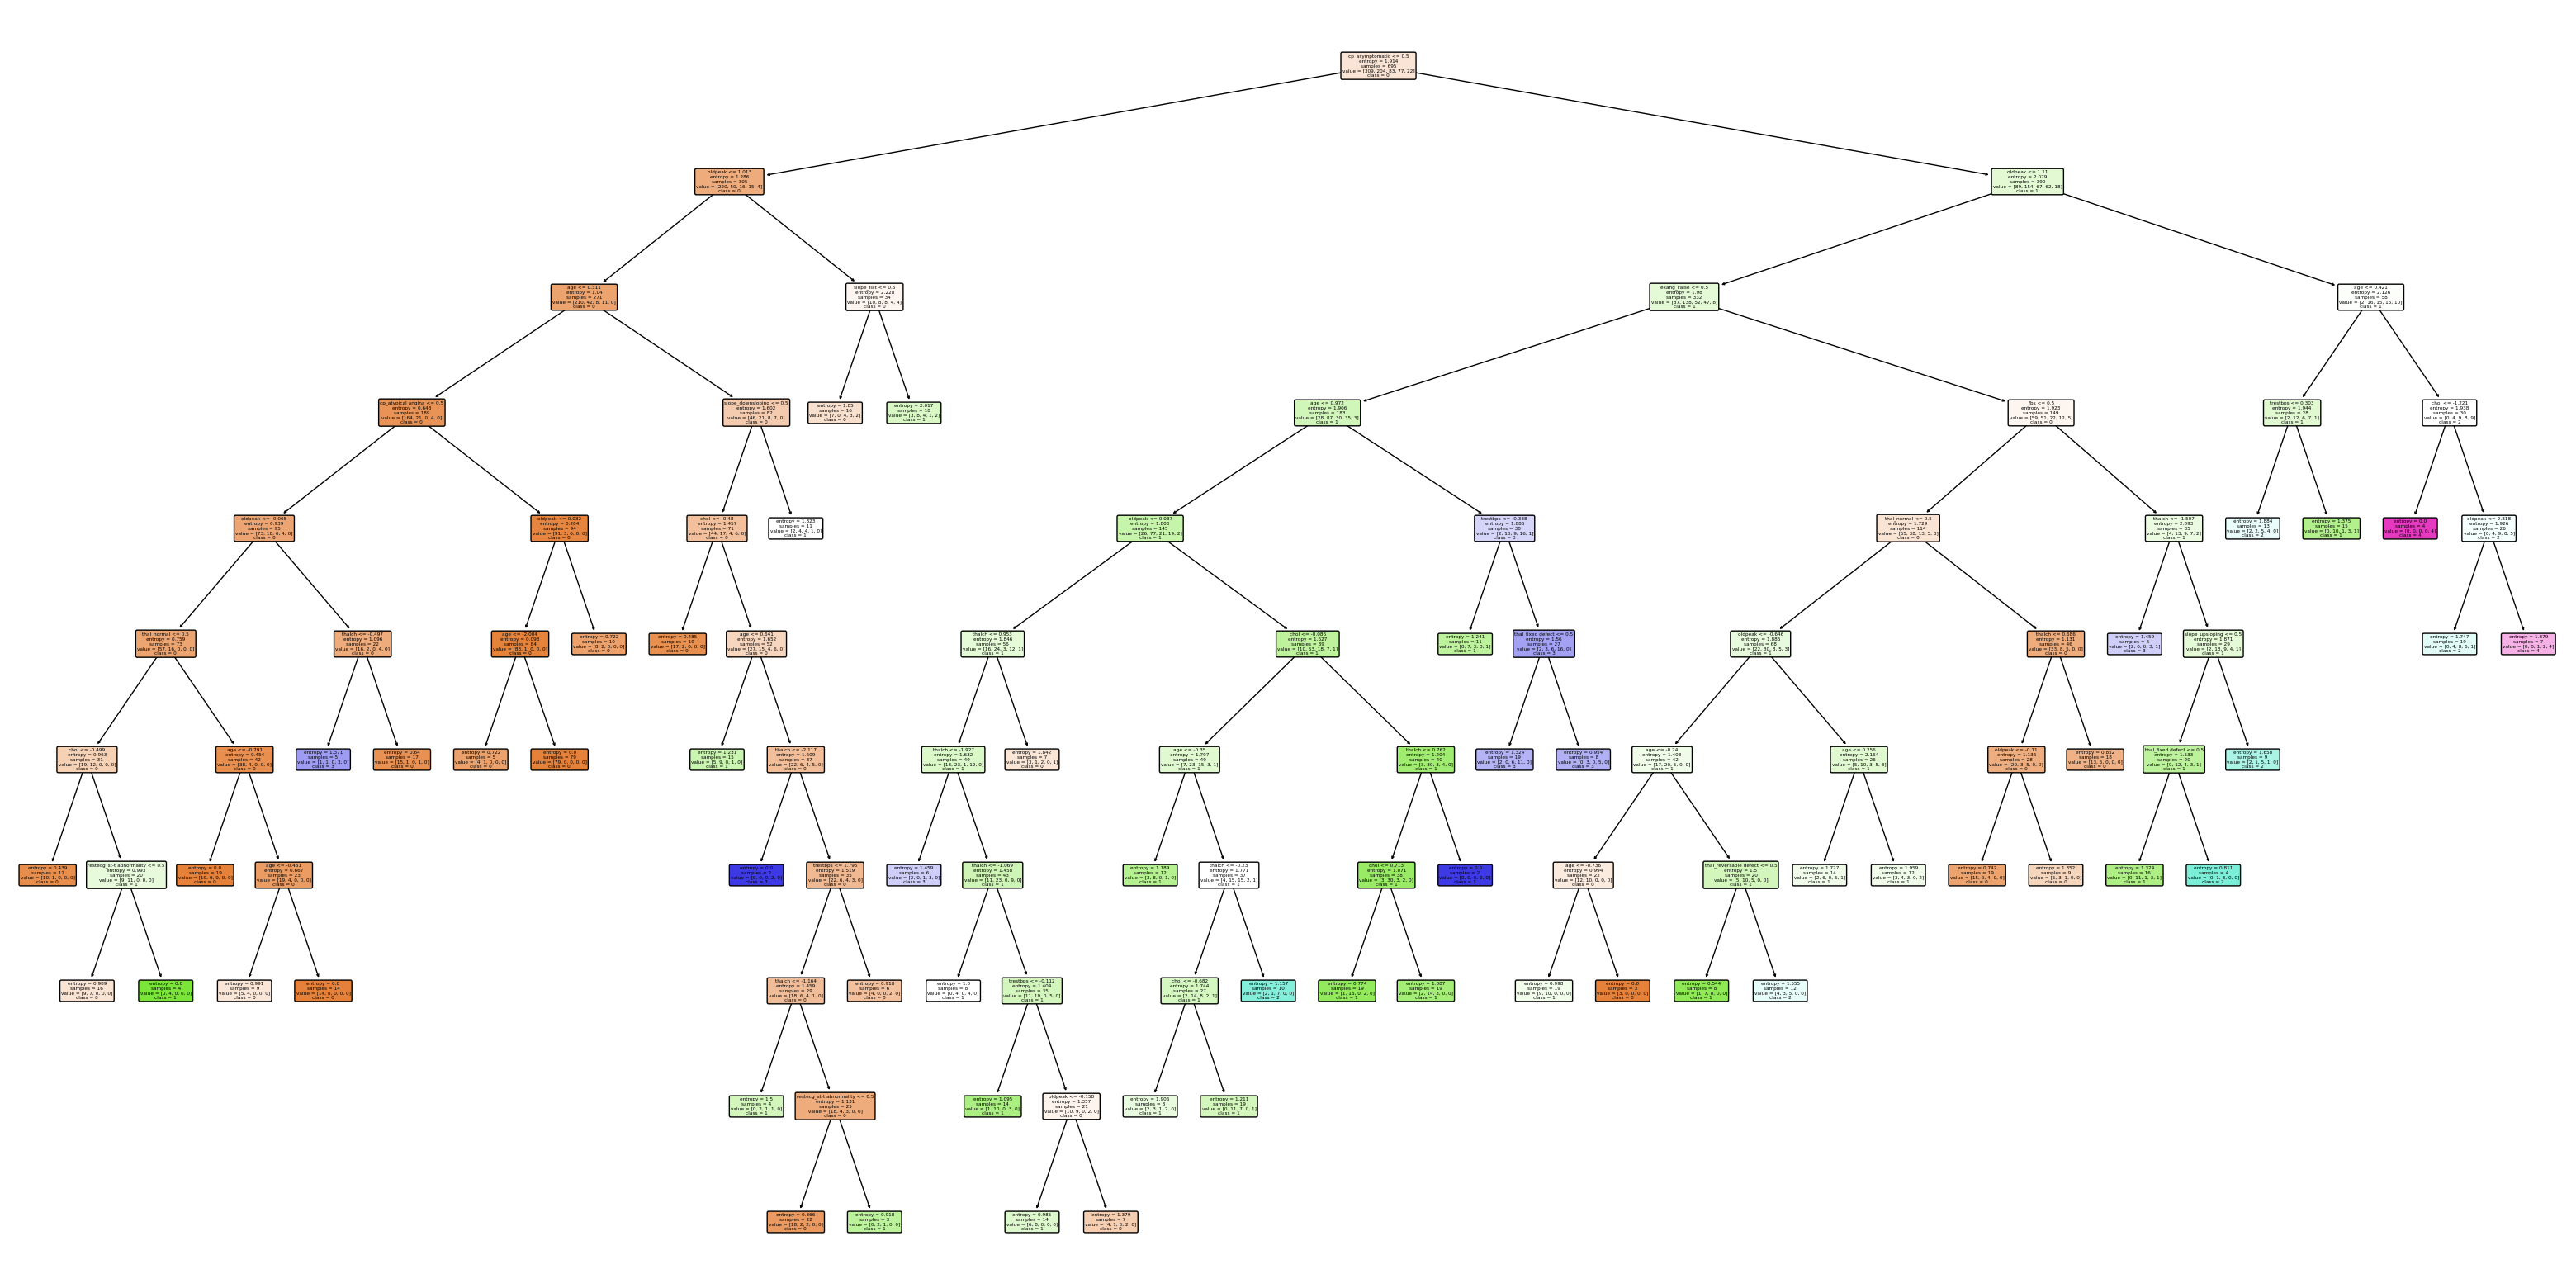

In [ ]:
# Visualize the decision tree structure
plt.figure(figsize=(40, 20))

# Determine the actual class names from your training data
class_names = [str(cls) for cls in np.unique(y_train)]

# Assuming X_train_encoded.columns contains the correct feature names
plot_tree(best_model, filled=True, feature_names= X_train_encoded.columns,
          class_names=class_names, rounded=True)

plt.show()

In [ ]:
# Identify important features
feature_importances = best_model.feature_importances_
importances_df = pd.DataFrame({
    'Feature': X_train_encoded.columns,
    'Importance': feature_importances
}).sort_values(by='Importance', ascending=False)

print(importances_df)

                     Feature  Importance
8            cp_asymptomatic    0.197907
5                    oldpeak    0.190548
0                        age    0.160862
4                     thalch    0.116211
2                       chol    0.068771
1                   trestbps    0.055715
23               thal_normal    0.036162
15               exang_False    0.034510
3                        fbs    0.025206
22         thal_fixed defect    0.024172
9         cp_atypical angina    0.021744
14  restecg_st-t abnormality    0.016333
20                slope_flat    0.015310
21           slope_upsloping    0.013455
19         slope_downsloping    0.012226
24    thal_reversable defect    0.010867
16                exang_True    0.000000
17               exang_FALSE    0.000000
18                exang_TURE    0.000000
13            restecg_normal    0.000000
11         cp_typical angina    0.000000
10            cp_non-anginal    0.000000
7                   sex_Male    0.000000
6               

- **Most Influential Features:** Features related to chest pain type (especially asymptomatic), ST depression (oldpeak), age, maximum heart rate achieved (thalch), and serum cholesterol level (chol) are the most influential in predicting heart disease.
- **Moderate Influence:** Resting blood pressure (trestbps) and specific results from thalassemia tests (thal_normal) also have a notable impact.
- **Least and Non-Influential Features:** Features related to specific conditions in thalassemia tests, various ECG results, and gender have minimal to no influence on the model’s decisions.

#**Interview Questions:**
####**1. What are some common hyperparameters of decision tree models, and how do they affect the model's performance?**



Common hyperparameters of decision tree models include **criterion, max_depth, min_samples_split, min_samples_leaf, max_features, and max_leaf_nodes**. Here's how they affect the model's performance:

**1. criterion:** This parameter determines the function used to measure the quality of a split.
- Options: 'gini' for Gini impurity, 'entropy' for information gain.
- Effect: Choosing different criteria can lead to different splits and hence different tree structures. Generally, entropy can be more computationally intensive than gini.

**2. max_depth:** The maximum depth of the tree.
- Effect: Limiting the depth can prevent overfitting by restricting the model's complexity. However, a too shallow tree might underfit the data.

**3. min_samples_split:** The minimum number of samples required to split an internal node.
- Effect: Increasing this value can prevent the model from learning overly specific patterns (overfitting) by requiring more data to justify a split.

**4. min_samples_leaf:** The minimum number of samples required to be at a leaf node.
- Effect: This can smooth the model, especially for regression tasks, by ensuring that leaf nodes contain more data. It helps in preventing overfitting.

**5.max_features:** The number of features to consider when looking for the best split.
- Options: Integer, float, 'auto', 'sqrt', 'log2', or None.
- Effect: Reducing the number of features can decrease variance (overfitting) by ensuring that splits are more generalizable. It can also speed up the computation.

**6.max_leaf_nodes:** The maximum number of leaf nodes in the tree.
- Effect: Limiting the number of leaf nodes can constrain the model complexity and prevent overfitting.

**7.splitter:** The strategy used to choose the split at each node.
- Options: 'best' to choose the best split, 'random' to choose the best random split.
- Effect: Using 'random' can introduce randomness in the split selection process, which can be useful in ensemble methods like Random Forests to create diverse trees.

####**How These Hyperparameters Affect Model Performance:**

**Overfitting and Underfitting:**
- Overfitting occurs when the model is too complex and captures noise in the data. Hyperparameters like max_depth, min_samples_split, min_samples_leaf, and max_leaf_nodes help control the complexity of the tree.
- Underfitting occurs when the model is too simple to capture the underlying patterns in the data. Reducing the constraints on these hyperparameters can help in fitting the data better.

**Bias-Variance Tradeoff:**
- Increasing max_depth or decreasing min_samples_split and min_samples_leaf reduces bias but increases variance (more complex model).
- Decreasing max_depth or increasing min_samples_split and min_samples_leaf increases bias but reduces variance (simpler model).

**Computation Time:**
- More complex models (with higher max_depth, lower min_samples_split, etc.) require more computation time.
- Limiting features with max_features or nodes with max_leaf_nodes can speed up training and prediction.

####**2. What is the difference between the Label encoding and One-hot encoding?**


Label encoding and one-hot encoding are two common techniques used to convert categorical data into numerical formats that machine learning algorithms can understand. Here's a detailed explanation of the differences between them:

###**Label Encoding**

Description: Label encoding converts each category in a feature to a unique numerical label.
Each category is assigned an integer value between 0 and n-1, where n is the number of categories.

**Advantages:**
- Simple and straightforward to implement.
- Requires less memory compared to one-hot encoding.

**Disadvantages:**
- Introduces ordinal relationships between categories that may not exist (e.g., 'cat' < 'dog' < 'fish'), which can mislead some algorithms.

**Use Case:**
- Suitable for ordinal categorical variables where the order of categories is meaningful (e.g., 'low', 'medium', 'high').

###**One-Hot Encoding**
Description: One-hot encoding creates a binary column for each category in the feature.
Each category is represented as a one-hot vector (a binary vector with a single high bit corresponding to the category).

**Advantages:**
- Does not introduce ordinal relationships between categories.
- Suitable for nominal categorical variables where no order exists between categories.

**Disadvantages:**
- Increases the dimensionality of the data, which can lead to the "curse of dimensionality" and require more memory and computation resources.

**Use Case:** Suitable for nominal categorical variables where there is no intrinsic order (e.g., 'red', 'blue', 'green').



###**Key Differences**

**Representation:**
- Label Encoding: Each category is converted to a unique integer.
- One-Hot Encoding: Each category is converted to a new binary column.

**Ordinal Relationship:**
- Label Encoding: Implies an ordinal relationship.
- One-Hot Encoding: Does not imply any ordinal relationship.

**Dimensionality:**
- Label Encoding: Does not increase the number of features.
- One-Hot Encoding: Increases the number of features, especially with many unique categories.

**Memory Usage:**
- Label Encoding: More memory efficient.
- One-Hot Encoding: Less memory efficient, especially for high-cardinality features.